# Neural Network exam {-}

This assignment aims at familiarizing you with training and testing a Deep Neural Network (DNN). Here are th requirements of the assignment:

- Load the data.
- Process and normalize the images.
- Build, train and test a model that has at most 4M (four millions) parameters (use model.summary() to check). The model must be built FROM SCRATCH and its architecture is of your choice.
- Evaluate the model performance on the test set.

The dataset you will be working on is cifar10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)

### Submission {-}
Coding environement:
- Google Colab: https://colab.research.google.com/
- Framework: Tensorflow

The structure of submission folder should be organized as follows:

- ./\<StudentID>-<StudentName>-<Test-accuracy>.ipynb: Jupyter notebook containing source code. For example, if your studentID is 20C12345, your name is Nguyen Van A, and you get 0.8124 accuracy on the test set, the name of this file is 20C12345-Nguyen-Van-A-08124.ipynb.

### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. In addition, your code should conform to a Python coding convention such as PEP-8. The grading schema is as follows:
- Top 5 test test accuracy: 10 points.
- Top 6-10 test accuray: 9 points.
- Top 11-20 test accuracy: 8 points.
- Top 21-30 test accuracy: 7 points.
- Top 31-last test accuracy: 6 points.
- Do not meet the assignment requirements (model having at most 4M parameters and built from scratch): 4 points.
- Plagiarism: 0 point.
- Do not submit: 0 point.

### Deadline {-}
- Deadline: TBD
- Submission link: TBD


In [ ]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow

In [ ]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train shape: X_train = (45000, 32, 32, 3), y_train = (45000, 1)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


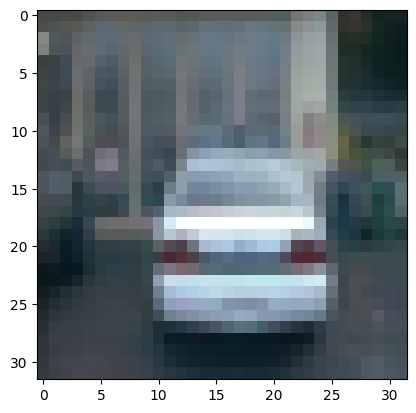

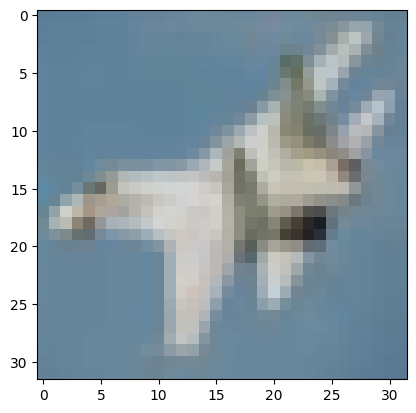

In [ ]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[5])
plt.show()
imgplot = plt.imshow(X_test[10])
plt.show()

In [ ]:
# Your code goes here

In [ ]:
# Normalize pixel values
X_train, X_test, X_val = X_train/255.0, X_test/255.0, X_val/255.0

In [ ]:
from keras.layers import Add, Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
import tensorflow as tf

# Define the residual block function
def residual_block(x, filters):
    # Shortcut connection
    shortcut = Conv2D(filters, (1, 1), padding='same')(x)

    # First convolution layer
    x = Conv2D(filters, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.009))(x)
    x = BatchNormalization()(x)

    # Second convolution layer
    x = Conv2D(filters, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.009))(x)
    x = BatchNormalization()(x)

    # Add shortcut to output
    x = Add()([x, shortcut])
    return x

# Define the model using residual blocks
inputs = Input(shape=(32, 32, 3))
x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.009))(inputs)
x = BatchNormalization()(x)

# Apply residual block

x = residual_block(x, 96)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Second residual block
x = residual_block(x, 128)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Third residual block
x = residual_block(x, 256)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Four residual block
x = residual_block(x, 320)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten and output
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.009))(x)
x = Dropout(0.35)(x)
outputs = Dense(10, activation='softmax')(x)

# Build the model
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 64)     │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 32, 32, 64)     │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 96)     │         55,392 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 32, 32, 96)     │            384 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 96)     │         83,040 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 32, 96)     │            384 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 32, 32, 96)     │          6,240 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 32, 32, 96)     │              0 │ batch_normalization_2… │
│                           │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 16, 16, 96)     │              0 │ add[0][0]              │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 16, 16, 128)    │        110,720 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 16, 16, 128)    │            512 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 128)    │        147,584 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 16, 16, 128)    │            512 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 16, 16, 128)    │         12,416 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 16, 16, 128)    │              0 │ batch_normalization_4… │
│                      

 Total params: 3,744,874 (14.29 MB)

 Trainable params: 3,741,546 (14.27 MB)

 Non-trainable params: 3,328 (13.00 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Compile the model
opt = Adam(learning_rate=0.0009)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define early stopping and model checkpoint callbacks

#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
mc = ModelCheckpoint(filepath="best_model.keras", monitor='val_loss', mode='min', save_best_only=True)

# Define a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-10, verbose=1)

# Fit the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=640),
                    validation_data=(X_val, y_val),
                    epochs=100,
                    callbacks=[lr_scheduler, mc])


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 123s 940ms/step - accuracy: 0.2602 - loss: 21.6038 - val_accuracy: 0.1054 - val_loss: 14.4908 - learning_rate: 9.0000e-04
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 72s 524ms/step - accuracy: 0.4308 - loss: 11.2190 - val_accuracy: 0.1012 - val_loss: 9.0890 - learning_rate: 9.0000e-04
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 81s 524ms/step - accuracy: 0.5053 - loss: 6.1040 - val_accuracy: 0.1050 - val_loss: 5.8357 - learning_rate: 9.0000e-04
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 42s 535ms/step - accuracy: 0.5719 - loss: 3.7818 - val_accuracy: 0.1164 - val_loss: 4.6119 - learning_rate: 9.0000e-04
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 545ms/step - accuracy: 0.6191 - loss: 2.7233 - val_accuracy: 0.1656 - val_loss: 4.2382 - learning_rate: 9.0000e-04
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 80s 515ms/step - accuracy: 0.6740 - loss: 2.1459 - val_accuracy: 0.1714 - val_loss: 3.7741 - learning_rate: 9.0000e-04
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 508ms/step - accu

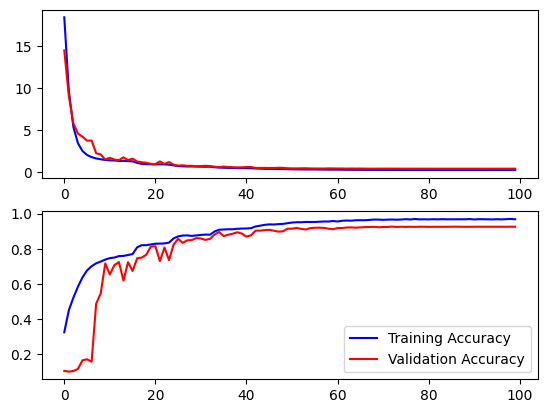

In [ ]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
# Đánh giá mô hình trên tập test
result = model.evaluate(X_test, y_test)
print(f'Test Loss: {result[0]} - Test Accuracy: {result[1]}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9269 - loss: 0.4463
Test Loss: 0.4481637179851532 - Test Accuracy: 0.9251999855041504
